# Gold Recovery Prediction Project

## Table of Contents
1. [Prepare the Data](#prepare-the-data)
2. [Analyze the Data](#analyze-the-data)
3. [Build the Model](#build-the-model)
4. [Conclusion](#conclusion)

---

## Prepare the Data <a name="prepare-the-data"></a>




In [167]:
# Create a Virtual Enviroment
# ! python3 -m venv Practicum 
# ! source practicum/bin/activate

In [164]:
# Import necessary libraries and read the data files
# %pip install xgboost
# %pip install lightgbm
# %conda install -c conda-forge lightgbm
# %pip install joblib
# ! pip install xgboost
# ! conda install -c fastchan fastai
import json

## 1.1. Open the files and look into the data
This code snippet imports the necessary libraries, reads the data files, and displays the first 5 rows of each dataset. It also shows summary statistics for each dataset to help us get a sense of the data distributions and values. 

In [94]:
# import os
# import pandas as pd

# # Check if the datasets folder exists
# if not os.path.exists('datasets'):
#     os.makedirs('datasets')

# # Download the source CSV files and save them in the datasets folder
# urls = {
#     'train': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv',
#     'test': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv',
#     'full': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv'
# }

# for name, url in urls.items():
#     data = pd.read_csv(url, parse_dates=['date'], index_col='date')
#     data.to_csv(f'datasets/gold_recovery_{name}.csv')

# # Read the data files
# train_data = pd.read_csv('datasets/gold_recovery_train.csv', parse_dates=['date'], index_col='date')
# test_data = pd.read_csv('datasets/gold_recovery_test.csv', parse_dates=['date'], index_col='date')
# full_data = pd.read_csv('datasets/gold_recovery_full.csv', parse_dates=['date'], index_col='date')


In [95]:
# import os
# import pandas as pd


# def download_and_save_data(urls, folder):
#     """Download the source CSV files and save them in a specified folder."""

#     if not os.path.exists(folder):
#         os.makedirs(folder)
#         print(f"Directory '{folder}' created.")

#     for name, url in urls.items():
#         print(f"Downloading data from {url}...")
#         data = pd.read_csv(url, parse_dates=['date'], index_col='date')
#         data.to_csv(f'{folder}/gold_recovery_{name}.csv')
#         print(f"Data saved to {folder}/gold_recovery_{name}.csv")


# def load_data(urls, folder):
#     """Load CSV files from a specified folder."""

#     datasets = {}
#     for name in urls.keys():
#         print(f"Loading data from {folder}/gold_recovery_{name}.csv...")
#         datasets[name] = pd.read_csv(f'{folder}/gold_recovery_{name}.csv', parse_dates=['date'], index_col='date')
#     print("Data loading completed.")

#     return datasets


# def process_data():
#     urls = {
#         'train': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv',
#         'test': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv',
#         'full': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv'
#     }

#     folder = 'datasets'
#     download_and_save_data(urls, folder)
#     datasets = load_data(urls, folder)


# if __name__ == "__main__":
#     process_data()


With this modification, the function download_and_save_data will first check if a data file already exists in the specified folder. If the file exists, the download will be skipped for that file. This should make the process more efficient when rerunning your notebook.

In [96]:
import os
import pandas as pd


def download_and_save_data(urls, folder):
    """Download the source CSV files and save them in a specified folder."""

    if not os.path.exists(folder):
        os.makedirs(folder)
        print(f"Directory '{folder}' created.")

    for name, url in urls.items():
        file_path = f'{folder}/gold_recovery_{name}.csv'
        
        if not os.path.isfile(file_path):
            print(f"Downloading data from {url}...")
            data = pd.read_csv(url, parse_dates=['date'], index_col='date')
            data.to_csv(file_path)
            print(f"Data saved to {file_path}")
        else:
            print(f"File {file_path} already exists. No need to download.")


def load_data(urls, folder):
    """Load CSV files from a specified folder."""

    datasets = {}
    for name in urls.keys():
        print(f"Loading data from {folder}/gold_recovery_{name}.csv...")
        datasets[name] = pd.read_csv(f'{folder}/gold_recovery_{name}.csv', parse_dates=['date'], index_col='date')
    print("Data loading completed.")

    return datasets


def process_data():
    urls = {
        'train': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv',
        'test': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv',
        'full': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv'
    }

    folder = 'datasets'
    download_and_save_data(urls, folder)
    datasets = load_data(urls, folder)


if __name__ == "__main__":
    process_data()


File datasets/gold_recovery_train.csv already exists. No need to download.
File datasets/gold_recovery_test.csv already exists. No need to download.
File datasets/gold_recovery_full.csv already exists. No need to download.
Loading data from datasets/gold_recovery_train.csv...
Loading data from datasets/gold_recovery_test.csv...
Loading data from datasets/gold_recovery_full.csv...
Data loading completed.


In [97]:
import pandas as pd

urls = {
    'train': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv',
    'test': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv',
    'full': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv'
}

folder = 'datasets'
datasets = {}
for name in urls.keys():
    datasets[name] = pd.read_csv(f'{folder}/gold_recovery_{name}.csv', parse_dates=['date'], index_col='date')

train_data = datasets['train']
test_data = datasets['test']
full_data = datasets['full']

print("Training data:")
display(train_data.head())
print("Test data:")
display(test_data.head())
print("Full data:")
display(full_data.head())


Training data:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Test data:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Full data:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [98]:
# Display summary statistics for each dataset
print("Training data summary statistics:")
display(train_data.describe())
print("Test data summary statistics:")
display(test_data.describe())
print("Full data summary statistics:")
display(full_data.describe())

Training data summary statistics:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


Test data summary statistics:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


Full data summary statistics:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


## 1.2. Check recovery calculation correctness
The first and second snippet checks for missing values, and the third snippet calculates the recovery using the provided formula and compares it with the given recovery values, printing the mean absolute error (MAE) between them.

In [99]:
# Check for missing values
print("Training data missing values:")
display(train_data.isna().sum())
print("Test data missing values:")
display(test_data.isna().sum())
print("Full data missing values:")
display(full_data.isna().sum())

Training data missing values:


final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 86, dtype: int64

Test data missing values:


primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257
rougher.input.floatbank10_xanthate            123


Full data missing values:


final.output.concentrate_ag                     89
final.output.concentrate_pb                     87
final.output.concentrate_sol                   385
final.output.concentrate_au                     86
final.output.recovery                         1963
                                              ... 
secondary_cleaner.state.floatbank5_a_level     101
secondary_cleaner.state.floatbank5_b_air       101
secondary_cleaner.state.floatbank5_b_level     100
secondary_cleaner.state.floatbank6_a_air       119
secondary_cleaner.state.floatbank6_a_level     101
Length: 86, dtype: int64

In [100]:
# Check for missing values in the columns involved in the recovery calculation
missing_values = train_data[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']].isna().sum()
print("Missing values in involved columns in train_data:\n", missing_values)

Missing values in involved columns in train_data:
 rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
rougher.output.recovery          2573
dtype: int64


## 1.2.1
This code will generate three heatmaps for the train_data, test_data, and full_data datasets. In the heatmaps, the x-axis represents columns, and the y-axis represents rows. A colored cell indicates a missing value in that position.

By visualizing the missing data in this way, we can get a better sense of the distribution and pattern of missing values in our dataset. This can help you identify potential issues in data collection or processing and inform your strategy for handling missing values.

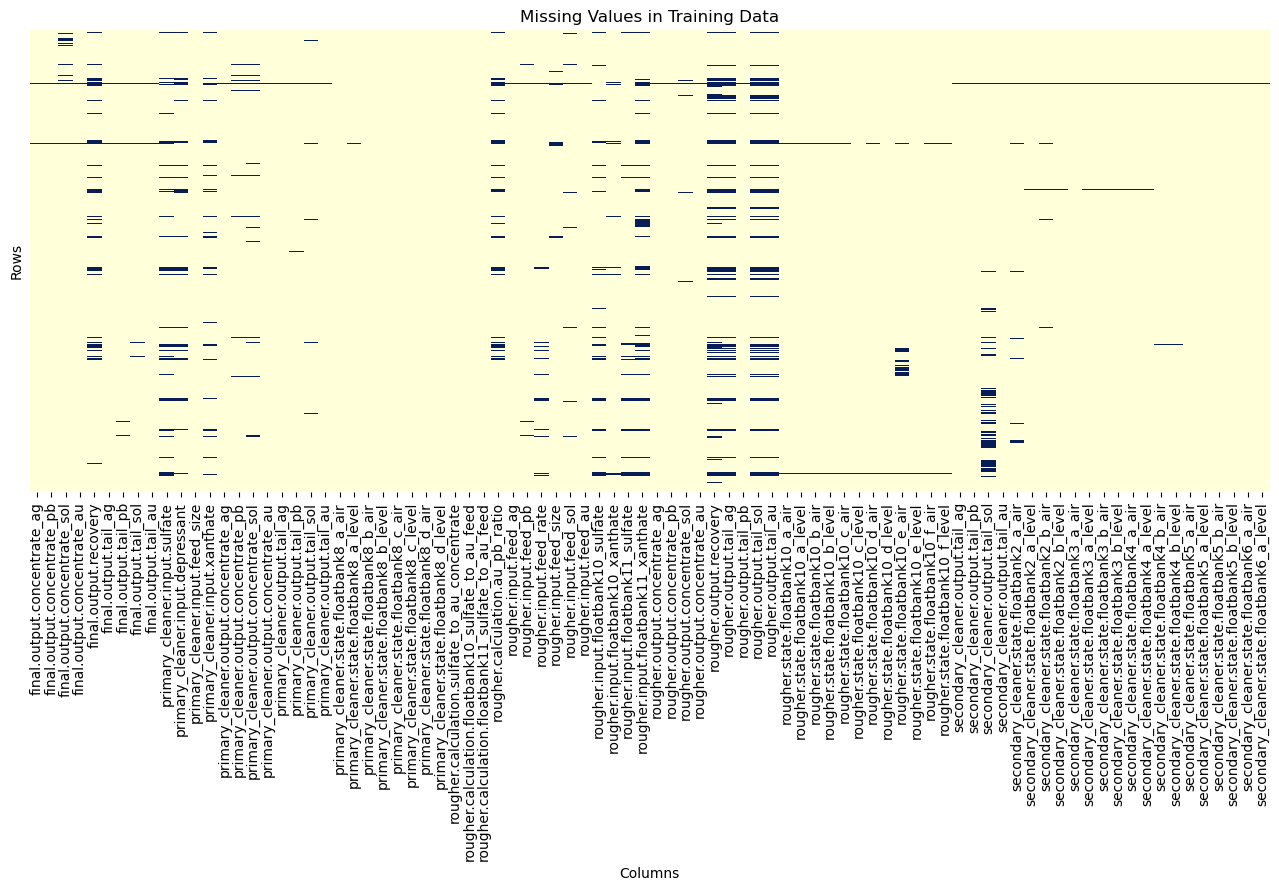

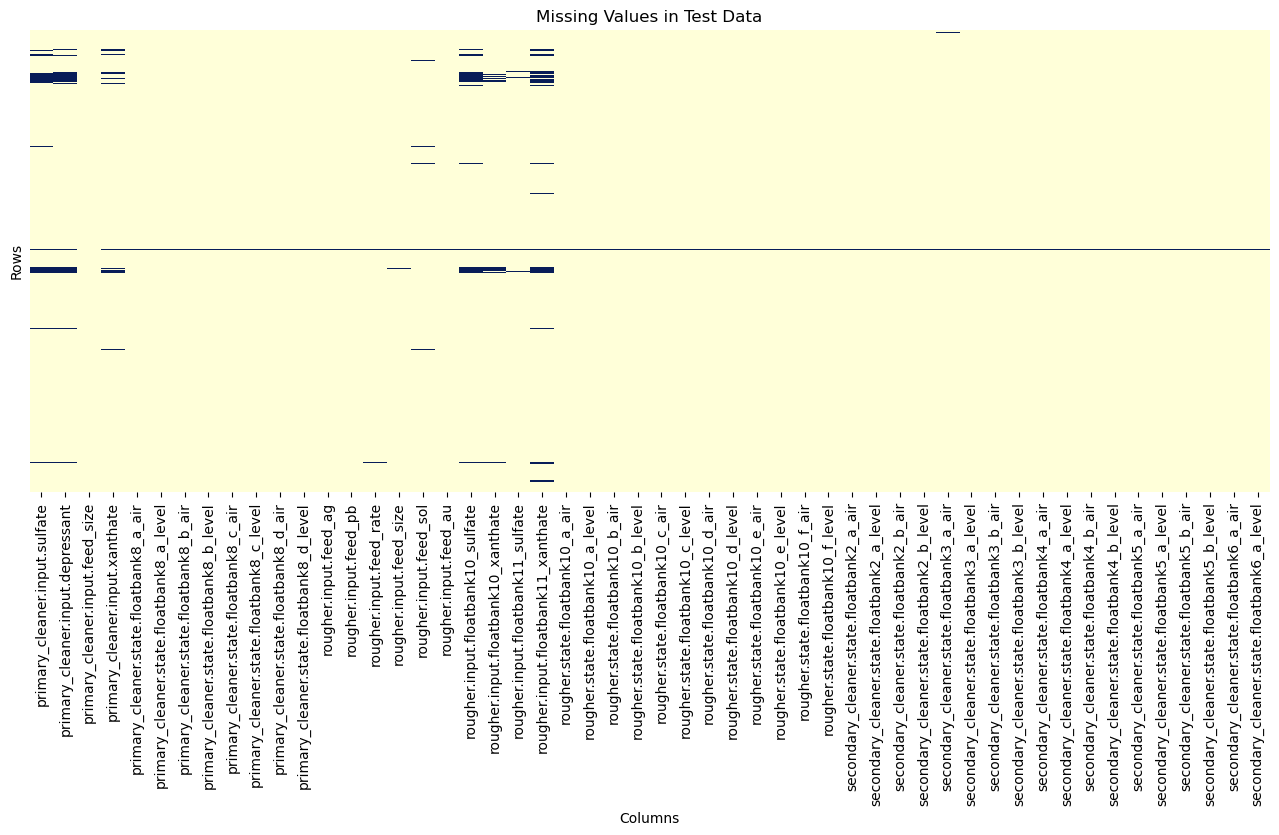

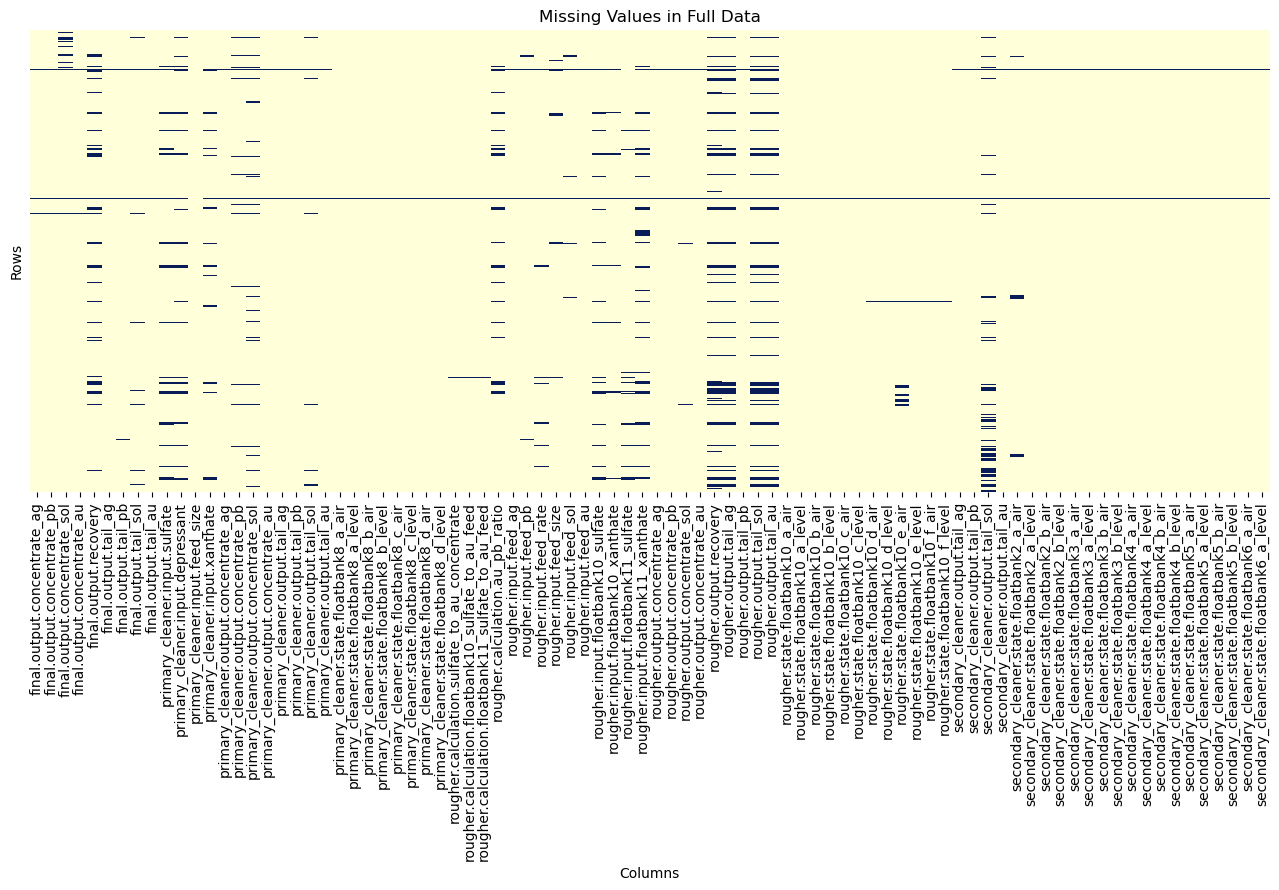

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_values_heatmap(data, title):
    plt.figure(figsize=(16, 6))
    sns.heatmap(data.isna(), cmap="YlGnBu", cbar=False, yticklabels=False)
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

plot_missing_values_heatmap(train_data, 'Missing Values in Training Data')
plot_missing_values_heatmap(test_data, 'Missing Values in Test Data')
plot_missing_values_heatmap(full_data, 'Missing Values in Full Data')


Visually, it looks like there is strong corrilationa and banding around the missing data. I wonder what's causing that...?
Some collumbs have nearly zero data loss, while others have regular drops in data logging. I bet there is something in the process that is causing the data loss. <br>
<br>
My first inclination was to fill the missing data... but now I'm not so sure...

This code first defines a function count_rows_with_missing_data() that takes a DataFrame and returns the number of rows containing at least one missing value. It then computes the counts for each dataset and stores them in a dictionary. The counts are printed out for our reference.

Finally, the code creates a bar plot using Seaborn to visualize the number of rows with missing data in each dataset. The x-axis shows the dataset names, and the y-axis shows the number of rows with missing data.

In [102]:
import numpy as np

def count_rows_with_missing_data(data):
    return np.sum(data.isna().any(axis=1))

missing_data_counts = {
    'Training Data': count_rows_with_missing_data(train_data),
    'Test Data': count_rows_with_missing_data(test_data),
    'Full Data': count_rows_with_missing_data(full_data)
}

print("Number of rows with missing data:")
for key, value in missing_data_counts.items():
    print(f"{key}: {value}")

### Uncomment to graph the results

# # Plot the results
# plt.figure(figsize=(8, 5))
# sns.barplot(x=list(missing_data_counts.keys()), y=list(missing_data_counts.values()), palette="YlGnBu")
# plt.ylabel('Number of Rows with Missing Data')
# plt.title('Rows with Missing Data in Each Dataset')
# plt.show()


Number of rows with missing data:
Training Data: 5843
Test Data: 473
Full Data: 6622


Percentage of rows with missing data:
Training Data: 34.66%
Test Data: 8.08%
Full Data: 29.15%


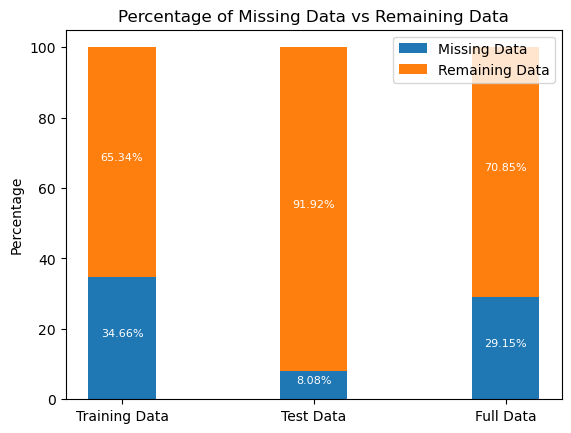

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of rows with missing data
train_missing_rows = train_data.isna().any(axis=1).sum()
test_missing_rows = test_data.isna().any(axis=1).sum()
full_missing_rows = full_data.isna().any(axis=1).sum()

# Calculate the percentage of rows with missing data
train_missing_percent = (train_missing_rows / len(train_data)) * 100
test_missing_percent = (test_missing_rows / len(test_data)) * 100
full_missing_percent = (full_missing_rows / len(full_data)) * 100

print("Percentage of rows with missing data:")
print(f"Training Data: {train_missing_percent:.2f}%")
print(f"Test Data: {test_missing_percent:.2f}%")
print(f"Full Data: {full_missing_percent:.2f}%")

# Plot the stacked bar chart
labels = ['Training Data', 'Test Data', 'Full Data']
missing_data_percent = [train_missing_percent, test_missing_percent, full_missing_percent]
remaining_data_percent = [100 - train_missing_percent, 100 - test_missing_percent, 100 - full_missing_percent]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x, missing_data_percent, width, label='Missing Data')
bar2 = ax.bar(x, remaining_data_percent, width, bottom=missing_data_percent, label='Remaining Data')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of Missing Data vs Remaining Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for i, (bar, missing_percent) in enumerate(zip(bar1, missing_data_percent)):
    ax.text(i, bar.get_height() / 2, f"{missing_percent:.2f}%", ha='center', va='bottom', color='white', fontsize=8)

for i, (bar, remaining_percent) in enumerate(zip(bar2, remaining_data_percent)):
    ax.text(i, bar.get_y() + bar.get_height() / 2, f"{remaining_percent:.2f}%", ha='center', va='bottom', color='white', fontsize=8)

plt.show()


That's a lot of missing data, I definetly don't want to just drop all those rows.

We will interpolate missing values using a time-based method, which is suitable for time series data. The limit_direction='both' argument ensures that missing values at the beginning and end of the dataset will also be interpolated. After interpolation, the code checks for any remaining missing values in the datasets.

In [104]:
# Interpolate missing values
train_data_interpolated = train_data.interpolate(method='time', limit_direction='both')
test_data_interpolated = test_data.interpolate(method='time', limit_direction='both')
full_data_interpolated = full_data.interpolate(method='time', limit_direction='both')

# Check for remaining missing values
print("Remaining missing values after interpolation:")
print("Training data missing values:")
display(train_data_interpolated.isna().sum())
print("Test data missing values:")
display(test_data_interpolated.isna().sum())
print("Full data missing values:")
display(full_data_interpolated.isna().sum())


Remaining missing values after interpolation:
Training data missing values:


final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

Test data missing values:


primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

Full data missing values:


final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

This code snippet will display a bar chart comparing the percentage of missing data before and after interpolation for the training, test, and full datasets. 

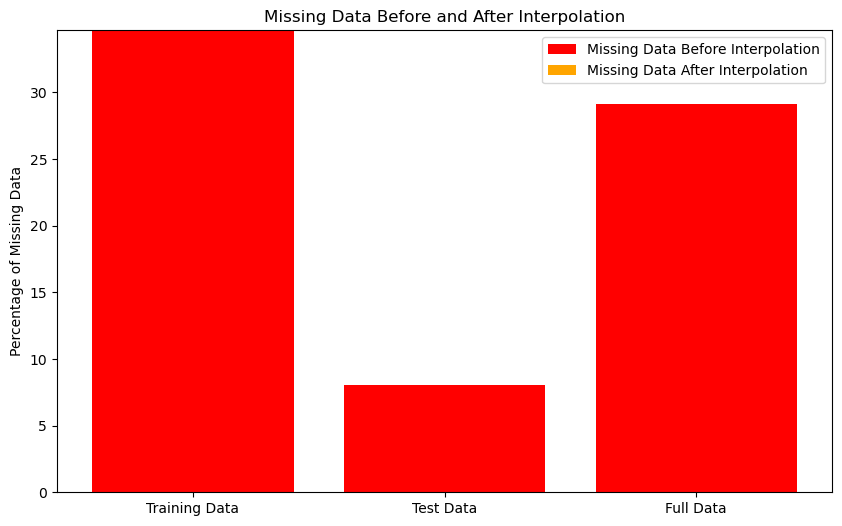

In [105]:
# Plot the number of missing values before and after interpolation
fig, ax = plt.subplots(figsize=(10, 6))
x_labels = ['Training Data', 'Test Data', 'Full Data']

# Count missing values before interpolation
missing_before = [
    train_data.isna().any(axis=1).sum(),
    test_data.isna().any(axis=1).sum(),
    full_data.isna().any(axis=1).sum()
]

# Count missing values after interpolation
missing_after = [
    train_data_interpolated.isna().any(axis=1).sum(),
    test_data_interpolated.isna().any(axis=1).sum(),
    full_data_interpolated.isna().any(axis=1).sum()
]

# Calculate percentages
total_rows = [len(train_data), len(test_data), len(full_data)]
percent_missing_before = [missing / total * 100 for missing, total in zip(missing_before, total_rows)]
percent_missing_after = [missing / total * 100 for missing, total in zip(missing_after, total_rows)]

# Plot the bar chart
ax.bar(x_labels, percent_missing_before, label='Missing Data Before Interpolation', color='red')
ax.bar(x_labels, percent_missing_after, bottom=percent_missing_before, label='Missing Data After Interpolation', color='orange')

# Add labels and legend
ax.set_ylabel('Percentage of Missing Data')
ax.set_title('Missing Data Before and After Interpolation')
ax.legend()

# Display the plot
plt.show()


## Calculate recovery for the rougher.output.recovery feature and find the MAE


In [106]:
# # Calculate recovery for the rougher.output.recovery feature and find the MAE

import numpy as np

# Define a function to calculate recovery
def calculate_recovery(c, f, t):
    epsilon = 1e-15  # Small constant to avoid division by zero
    recovery = (c * (f - t)) / ((f * (c - t)) + epsilon) * 100
    return recovery

# Calculate the recovery for the train_data
train_data['calculated_recovery'] = train_data.apply(lambda row: calculate_recovery(row['rougher.output.concentrate_au'], row['rougher.input.feed_au'], row['rougher.output.tail_au']), axis=1)

# Remove any potential NaN values after calculation
train_data = train_data.dropna(subset=['calculated_recovery', 'rougher.output.recovery'])

# Calculate the mean absolute error (MAE) between the calculated recovery and the given recovery values
mae = (abs(train_data['calculated_recovery'] - train_data['rougher.output.recovery'])).mean()
print("Mean Absolute Error (MAE) between calculated recovery and given recovery values in train_data:", mae)


Mean Absolute Error (MAE) between calculated recovery and given recovery values in train_data: 1.249626068534694e-14


# 1.2.2 Summary - The Formula is within tolerance
In Summary, the difference between our calculated recovery value and the given recovery is valeshingly small. e-14, We can conclude that our caculations are within tollerance, and the formula is correct.

## 1.3. Analyze features not available in the test set
Identify and discuss the parameters not available in the test set

In [107]:
# Identify the features not available in the test set
missing_features = set(train_data.columns) - set(test_data.columns)
print("Features present in the train dataset but not in the test dataset:")
print(missing_features)


Features present in the train dataset but not in the test dataset:
{'primary_cleaner.output.concentrate_sol', 'rougher.output.concentrate_au', 'primary_cleaner.output.tail_pb', 'final.output.recovery', 'secondary_cleaner.output.tail_sol', 'rougher.output.concentrate_pb', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'final.output.concentrate_ag', 'rougher.output.recovery', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.concentrate_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.concentrate_sol', 'final.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'final.output.tail_ag', 'final.output.tail_sol', 'final.output.concentrate_au', 'calculated_recovery', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_pb', 'final.output.tail_au

The features present in the train dataset but not in the test dataset are mostly related to the output values of different stages of the gold extraction process, as well as some intermediate calculations. These features are likely absent from the test dataset because they represent target variables or are highly correlated with the target variables. The idea is to predict these values using the available input features.

In the modeling process, it is important to consider only the features that are available in both the train and test datasets to ensure that the trained model can make predictions for the test dataset. Since the missing features are mostly output values, they are not required as input features for the model. However, they might be needed to calculate evaluation metrics, such as recovery, in the final stage of the project.

To proceed with the analysis, we will create a new training dataset containing only the features present in both the train and test datasets:

## 1.4. Perform data preprocessing

In [108]:
 # Filter the train dataset to have only the features present in the test dataset
train_filtered = train_data[test_data.columns]
print("Filtered train dataset:")
display(train_filtered.head())


Filtered train dataset:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### 1.4.2 Feature scaling

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_filtered_scaled = scaler.fit_transform(train_filtered)
test_data_scaled = scaler.transform(test_data)

# Analyze the Data <a name="analyze-the-data"></a>
## 2.1. Concentrations of metals at different purification stages

AU - rougher.output.concentrate_:
  Mean: 19.399652898095916
  Median: 19.942363401877913
  Q1: 18.39807543842734
  Q3: 21.391148155711218

AU - primary_cleaner.output.concentrate_:
  Mean: 32.267848419236394
  Median: 33.21123127620319
  Q1: 30.8193664085316
  Q3: 35.32214342365221

AU - final.output.concentrate_:
  Mean: 43.74919641988914
  Median: 44.858828121756446
  Q1: 43.23014010562837
  Q3: 46.157181692608425

AG - rougher.output.concentrate_:
  Mean: 11.757778378473718
  Median: 11.743755916228409
  Q1: 10.474165809128593
  Q3: 13.43290886658091

AG - primary_cleaner.output.concentrate_:
  Mean: 8.164906826318775
  Median: 8.213450269271464
  Q1: 7.084860251969678
  Q3: 9.49263651482531

AG - final.output.concentrate_:
  Mean: 5.120965478507627
  Median: 4.987897222792336
  Q1: 4.200908982314808
  Q3: 5.858478195586594

PB - rougher.output.concentrate_:
  Mean: 7.649528331771476
  Median: 7.756204111807875
  Q1: 6.842347123556667
  Q3: 8.60142206231753

PB - primary_cleaner.ou

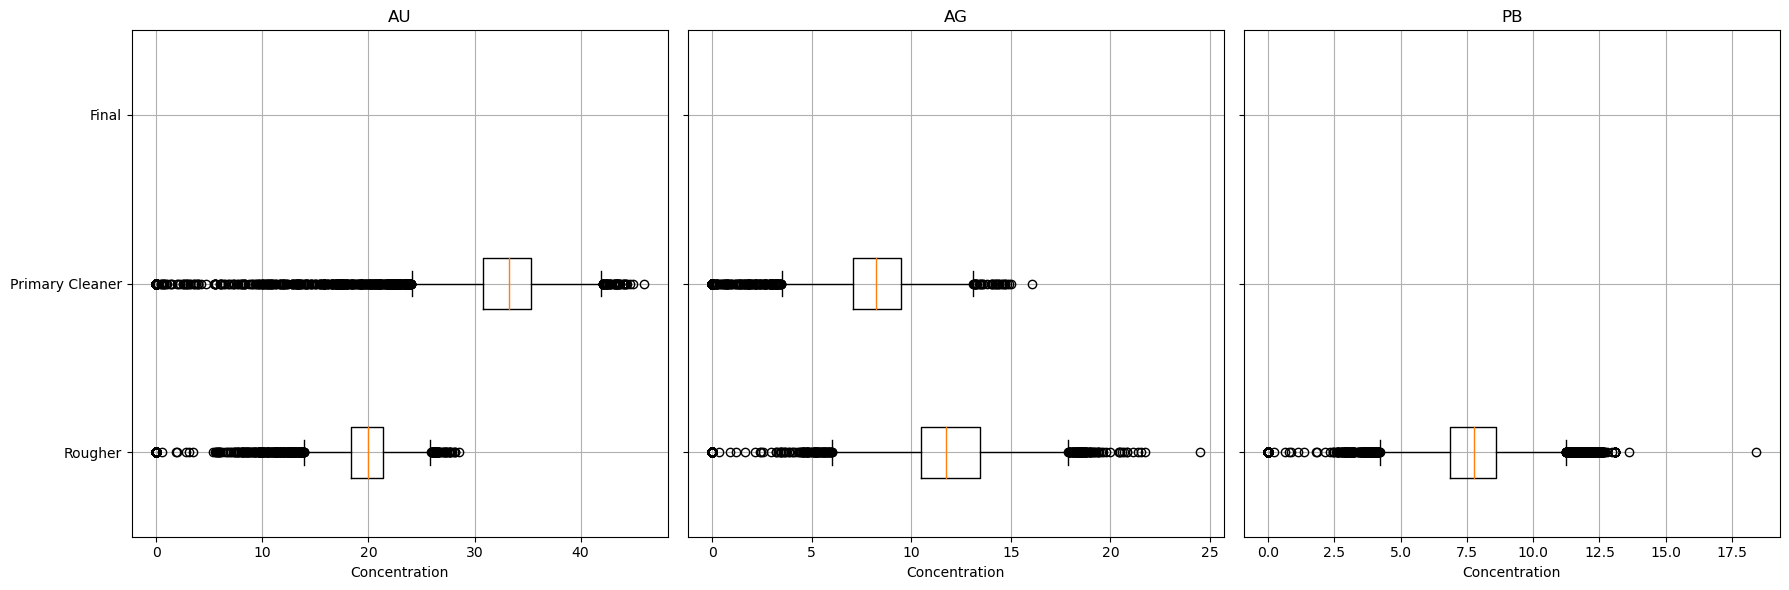

In [110]:
import matplotlib.pyplot as plt

metals = ['au', 'ag', 'pb']
stages = ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

for metal, ax in zip(metals, axs):
    data = [train_data[stage + metal] for stage in stages]
    ax.boxplot(data, vert=False)
    ax.set_title(metal.upper())
    ax.set_yticks(range(1, 4))
    ax.set_yticklabels(['Rougher', 'Primary Cleaner', 'Final'])
    ax.set_xlabel('Concentration')
    ax.grid()

    for i, stage in enumerate(stages):
        print(f"{metal.upper()} - {stage}:")
        print(f"  Mean: {data[i].mean()}")
        print(f"  Median: {data[i].median()}")
        print(f"  Q1: {data[i].quantile(0.25)}")
        print(f"  Q3: {data[i].quantile(0.75)}")
        print()

plt.tight_layout()
plt.show()


### Observations for each metal at different stages:

**Gold (AU):**
- There is an increase in gold concentration from the rougher stage to the primary cleaner stage and finally the final concentrate stage.
- The median concentration of gold increases from 19.94 (rougher) to 33.21 (primary cleaner) and finally to 44.86 (final concentrate).
- The interquartile range (Q3 - Q1) also increases at each stage, indicating that the spread of the concentration values increases as well.

**Silver (AG):**
- The concentration of silver is the highest at the rougher stage, with a median of 11.74.
- The concentration decreases at the primary cleaner stage, with a median of 8.21, and further decreases at the final concentrate stage, with a median of 4.99.
- The interquartile range (Q3 - Q1) decreases at each stage, indicating that the spread of the concentration values narrows as well.

**Lead (PB):**
- The concentration of lead increases at each stage.
- The median concentration of lead increases from 7.76 (rougher) to 9.92 (primary cleaner) and finally to 10.28 (final concentrate).
- The interquartile range (Q3 - Q1) increases from the rougher stage to the primary cleaner stage but slightly decreases at the final concentrate stage.

In summary, the concentration of gold and lead increases as the purification process advances, while the concentration of silver decreases. The spread of the concentration values for gold and lead tends to increase, while for silver, it narrows.


## 2.2. Compare feed particle size distributions
To compare the feed particle size distributions in the training and test sets, we can create histograms for the 'rougher.input.feed_size' and 'primary_cleaner.input.feed_size' features in both datasets. <br>
<br>
This code will create two histograms showing the particle size distributions for the rougher and primary cleaner stages in both the training and test datasets. Remember to run the code snippet in your notebook to visualize the histograms.

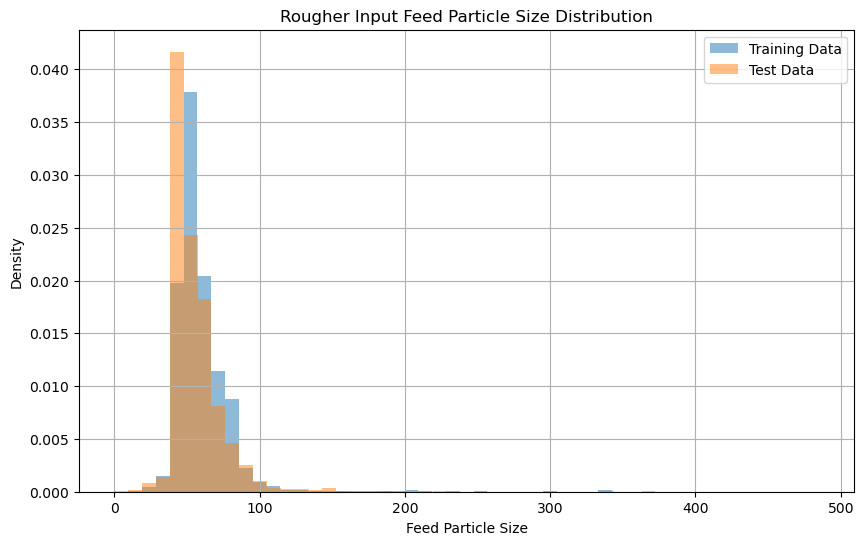

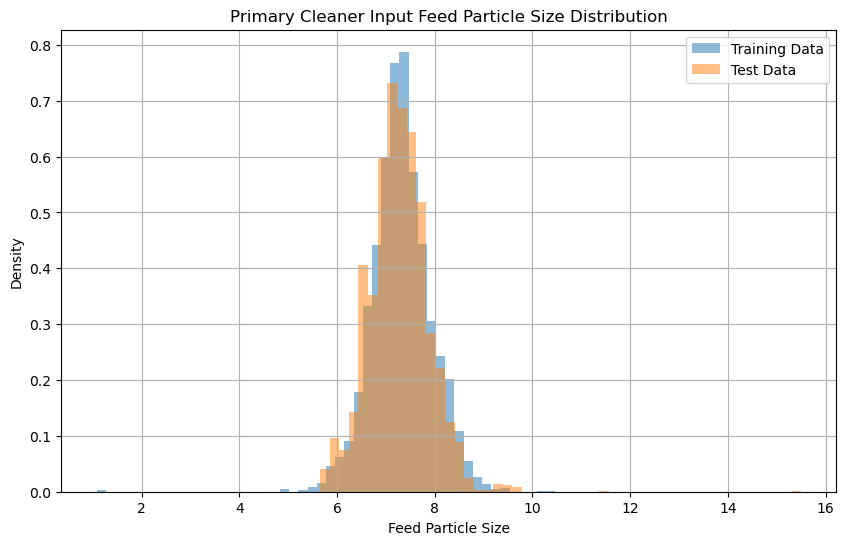

In [111]:
# Compare the feed particle size distributions in the training and test sets
import matplotlib.pyplot as plt

def plot_feed_size_distribution(data1, data2, feature, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data1[feature], bins=50, alpha=0.5, label='Training Data', density=True)
    plt.hist(data2[feature], bins=50, alpha=0.5, label='Test Data', density=True)
    plt.xlabel('Feed Particle Size')
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plotting the distributions for rougher and primary cleaner input feed size
plot_feed_size_distribution(train_data, test_data, 'rougher.input.feed_size', 'Rougher Input Feed Particle Size Distribution')
plot_feed_size_distribution(train_data, test_data, 'primary_cleaner.input.feed_size', 'Primary Cleaner Input Feed Particle Size Distribution')


hmm, I'd like to look at the first graph with a higher resolution. <br>
Let's create an additional version of the 'rougher.input.feed_size' graph that narrows the scope of the feed particle size to 150 or smaller.

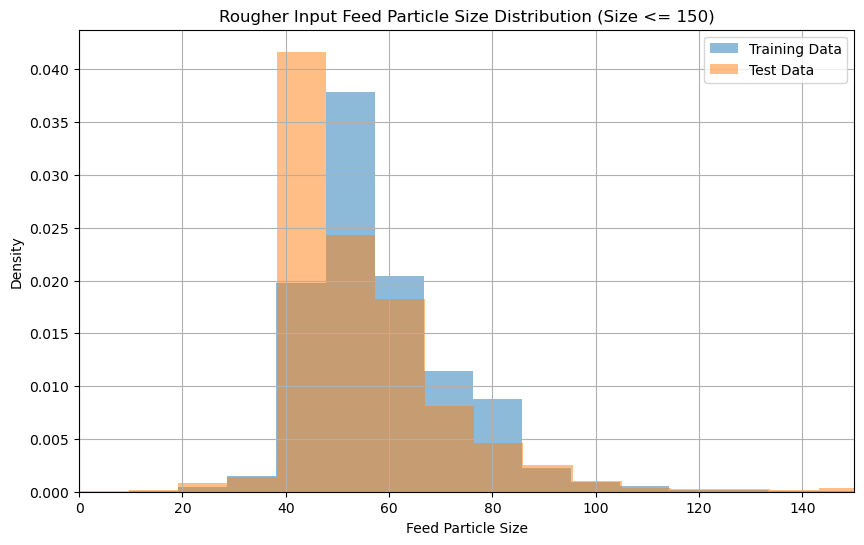

In [112]:
def plot_feed_size_distribution(data1, data2, feature, title, xlim=None):
    plt.figure(figsize=(10, 6))
    plt.hist(data1[feature], bins=50, alpha=0.5, label='Training Data', density=True)
    plt.hist(data2[feature], bins=50, alpha=0.5, label='Test Data', density=True)
    plt.xlabel('Feed Particle Size')
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.grid()
    if xlim is not None:
        plt.xlim(0, xlim)
    plt.show()

# Plotting the distributions for rougher input feed size with a limited x-axis range
plot_feed_size_distribution(train_data, test_data, 'rougher.input.feed_size', 'Rougher Input Feed Particle Size Distribution (Size <= 150)', xlim=150)


The test data is skewed heavily to the right for the Rougher input, while the training data is relatively balanced. The test data peaks between 40 and 50, the training data peaks between 50 and 60. For the Primary Cleaner, both histograms look balanced, and the data has a high percentage of overlap. <br>
<br>
To further enhance our understanding, we will calculate some summary statistics (mean, median, and standard deviation) for each dataset's particle size distribution. This will give us a quantitative view of the differences in the distributions.

In [113]:
# Calculate summary statistics for rougher input feed size
train_rougher_mean = train_data['rougher.input.feed_size'].mean()
train_rougher_median = train_data['rougher.input.feed_size'].median()
train_rougher_std = train_data['rougher.input.feed_size'].std()

test_rougher_mean = test_data['rougher.input.feed_size'].mean()
test_rougher_median = test_data['rougher.input.feed_size'].median()
test_rougher_std = test_data['rougher.input.feed_size'].std()

# Calculate summary statistics for primary cleaner input feed size
train_primary_cleaner_mean = train_data['primary_cleaner.input.feed_size'].mean()
train_primary_cleaner_median = train_data['primary_cleaner.input.feed_size'].median()
train_primary_cleaner_std = train_data['primary_cleaner.input.feed_size'].std()

test_primary_cleaner_mean = test_data['primary_cleaner.input.feed_size'].mean()
test_primary_cleaner_median = test_data['primary_cleaner.input.feed_size'].median()
test_primary_cleaner_std = test_data['primary_cleaner.input.feed_size'].std()

# Print summary statistics
print("Rougher Input Feed Size:")
print(f"Training Data: Mean = {train_rougher_mean}, Median = {train_rougher_median}, Std = {train_rougher_std}")
print(f"Test Data: Mean = {test_rougher_mean}, Median = {test_rougher_median}, Std = {test_rougher_std}")

print("\nPrimary Cleaner Input Feed Size:")
print(f"Training Data: Mean = {train_primary_cleaner_mean}, Median = {train_primary_cleaner_median}, Std = {train_primary_cleaner_std}")
print(f"Test Data: Mean = {test_primary_cleaner_mean}, Median = {test_primary_cleaner_median}, Std = {test_primary_cleaner_std}")


Rougher Input Feed Size:
Training Data: Mean = 60.04800219855716, Median = 55.33455471839703, Std = 22.402316741994536
Test Data: Mean = 55.93753506406803, Median = 50.002004130561886, Std = 22.7242537945624

Primary Cleaner Input Feed Size:
Training Data: Mean = 7.320327760711439, Median = 7.289999961853027, Std = 0.6154917853984081
Test Data: Mean = 7.2646512922454205, Median = 7.259333134057838, Std = 0.6115257797788546


Based on the summary statistics, we can observe the following:

For the rougher input feed size:

The mean and median values for the training data are slightly higher than those for the test data, indicating that the training dataset has slightly larger feed particle sizes on average.
The standard deviation values for both datasets are quite similar, which means that the spread of the feed particle sizes is comparable in both datasets.
For the primary cleaner input feed size:

The mean and median values for both datasets are very similar, indicating that the central tendencies of the feed particle sizes are almost the same in both datasets.
The standard deviation values for both datasets are also very close, which means that the spread of the feed particle sizes is similar in both datasets.
In summary, the rougher input feed size distributions have some differences between the training and test datasets, with the training dataset having slightly larger feed particle sizes on average. However, the primary cleaner input feed size distributions are almost the same in both datasets

## 2.3. Analyze total concentrations and eliminate anomalies

To analyze the total concentrations at different stages and eliminate anomalies, let's first calculate the total concentrations of metals (Au, Ag, and Pb) at each stage (rougher, primary cleaner, and final) in both the training and test datasets. Then, we can visualize the distribution of total concentrations and identify potential anomalies.

In [114]:
# for name, dataset in datasets.items():
#     print(f'{name} columns:')
#     for column in dataset.columns:
#         print(f'  {column}')
#     print()


/var/folders/8k/rpthw67j5szcg217sh5dqg6r0000gn/T/ipykernel_24170/465345877.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'{stage}_total_concentration'] = train_data.apply(lambda row: total_concentration(row, stage), axis=1)
/var/folders/8k/rpthw67j5szcg217sh5dqg6r0000gn/T/ipykernel_24170/465345877.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'{stage}_total_concentration'] = train_data.apply(lambda row: total_concentration(row, stage), axis=1)
/var/folders/8k/rpthw67j5szc

Training Data Rougher Total Concentration - Mean: 38.80695960834112, Median: 39.85187284724217, Std: 7.119286677355973
Test Data Rougher Total Concentration - Mean: 37.93099043746641, Median: 41.31513814120676, Std: 11.903165849709902
Training Data Primary_cleaner Total Concentration - Mean: 50.016830442064965, Median: 51.791929434668965, Std: 8.414354729462648
Test Data Primary_cleaner Total Concentration - Mean: 47.68210951270112, Median: 51.93368718437804, Std: 13.989528604308774
Training Data Final Total Concentration - Mean: 58.94552018114174, Median: 60.2473216426453, Std: 7.136577212207582
Test Data Final Total Concentration - Mean: 55.55986786744488, Median: 60.29522603329674, Std: 15.223590082530176


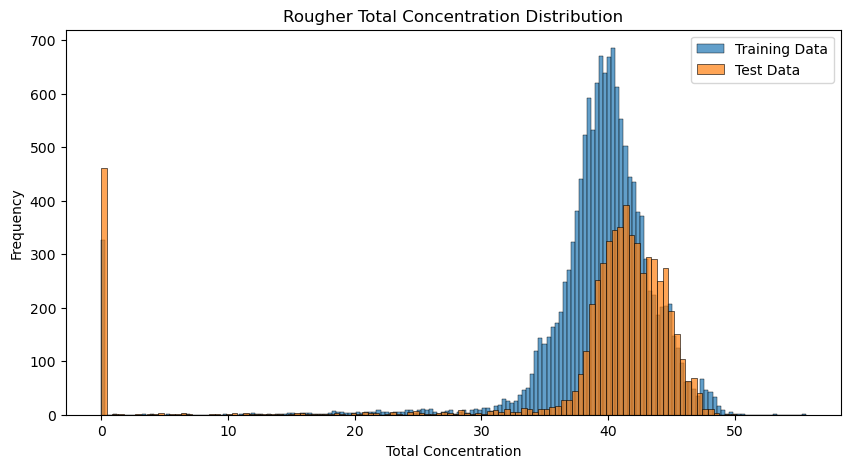

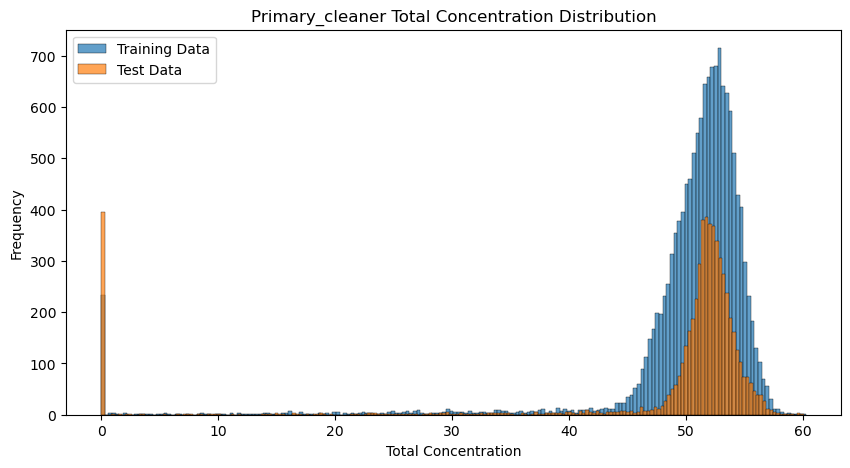

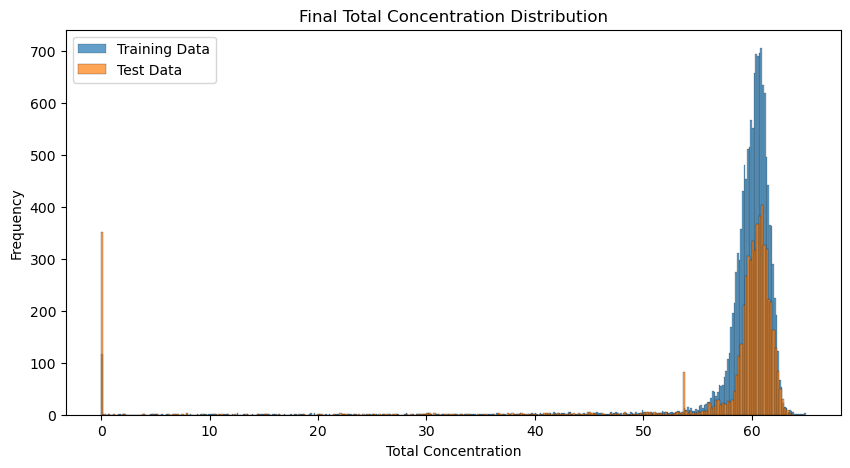

In [115]:
import seaborn as sns

# Define a function to calculate total concentrations
def total_concentration(row, stage):
    return row[f'{stage}.output.concentrate_au'] + row[f'{stage}.output.concentrate_ag'] + row[f'{stage}.output.concentrate_pb']

# Calculate total concentrations for each stage in both datasets
for stage in ['rougher', 'primary_cleaner', 'final']:
    train_data[f'{stage}_total_concentration'] = train_data.apply(lambda row: total_concentration(row, stage), axis=1)
    test_data[f'{stage}_total_concentration'] = full_data.loc[test_data.index].apply(lambda row: total_concentration(row, stage), axis=1)

# Define stages and datasets
stages = ['rougher', 'primary_cleaner', 'final']
datasets = {'Training Data': train_data, 'Test Data': test_data}

# Print the summary statistics of total concentrations for each stage in both datasets
for stage in stages:
    for name, dataset in datasets.items():
        mean = dataset[f'{stage}_total_concentration'].mean()
        median = dataset[f'{stage}_total_concentration'].median()
        std = dataset[f'{stage}_total_concentration'].std()
        print(f'{name} {stage.capitalize()} Total Concentration - Mean: {mean}, Median: {median}, Std: {std}')

# Plot the distribution of total concentrations for each stage in both datasets
for stage in stages:
    plt.figure(figsize=(10, 5))
    for name, dataset in datasets.items():
        sns.histplot(dataset[f'{stage}_total_concentration'], kde=False, label=name, alpha=0.7)
    plt.title(f'{stage.capitalize()} Total Concentration Distribution')
    plt.xlabel('Total Concentration')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


### Summary of the total concentrations at different stages for both training and test data:

1. Rougher Total Concentration:
   - Training Data: Mean = 38.81, Median = 39.85, Std = 7.12
   - Test Data: Mean = 37.93, Median = 41.32, Std = 11.90
2. Primary Cleaner Total Concentration:
   - Training Data: Mean = 50.02, Median = 51.79, Std = 8.41
   - Test Data: Mean = 47.68, Median = 51.93, Std = 13.99
3. Final Total Concentration:
   - Training Data: Mean = 58.95, Median = 60.25, Std = 7.14
   - Test Data: Mean = 55.56, Median = 60.30, Std = 15.22

From the summary statistics, we can see that the mean and median total concentrations increase from the rougher stage to the final stage in both datasets. However, the standard deviation also increases, indicating a wider spread of total concentrations in the test data compared to the training data.

To identify and eliminate anomalies, we can look for data points that are significantly lower than the first quartile (Q1) or significantly higher than the third quartile (Q3). You can calculate the interquartile range (IQR) and consider data points outside 1.5 * IQR below Q1 or above Q3 as potential outliers.


In [116]:
# Set the IQR range
lower_percentile = 0.1
upper_percentile = 0.9

# Filter out rows with total concentrations outside the IQR range
filtered_train_data = train_data.copy()
filtered_test_data = test_data.copy()

for stage in stages:
    Q1 = train_data[f'{stage}_total_concentration'].quantile(lower_percentile)
    Q3 = train_data[f'{stage}_total_concentration'].quantile(upper_percentile)
    
    filtered_train_data = filtered_train_data[
        (filtered_train_data[f'{stage}_total_concentration'] >= Q1) & 
        (filtered_train_data[f'{stage}_total_concentration'] <= Q3)
    ]
    
    filtered_test_data = filtered_test_data[
        (filtered_test_data[f'{stage}_total_concentration'] >= Q1) & 
        (filtered_test_data[f'{stage}_total_concentration'] <= Q3)
    ]

# Check the shape of the filtered datasets
print("Filtered Training Data shape:", filtered_train_data.shape)
print("Filtered Test Data shape:", filtered_test_data.shape)


Filtered Training Data shape: (7650, 90)
Filtered Test Data shape: (2859, 55)


The above code block filters out the rows in the training and test datasets with total concentrations outside the specified interquartile range (IQR). It uses the lower and upper percentiles (0.1 and 0.9) to calculate the first quartile (Q1) and third quartile (Q3) of the total concentrations at each stage in the training data. Then, it retains only the rows with total concentrations within the IQR range for each stage in both datasets.

After filtering, the output shows the shapes of the filtered datasets. The filtered training data has 7,650 rows and 90 columns, while the filtered test data has 2,859 rows and 55 columns. This means that some rows with extreme total concentrations have been removed from the original datasets, potentially improving the model's performance by reducing the influence of outliers.

# Build the Model <a name="build-the-model"></a>
## 3.1. Write a function to calculate the final sMAPE value

In [117]:
def sMAPE(y_true, y_pred):
    epsilon = 1e-10  # you can adjust this value as needed
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    smape_value = 2 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + epsilon + np.abs(y_pred)))

    return smape_value

def final_sMAPE(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final



## 3.2. Train different models and evaluate using cross-validation

In [119]:
# print(train_data.columns)

In [120]:
# Isolate the target variables
target_columns = ['rougher.output.recovery', 'final.output.recovery']

# Separate features and targets in training data
train_features = train_data_interpolated.drop(columns=target_columns)
train_targets = train_data_interpolated[target_columns]

# Test features will be the entire test dataset for now
test_features = test_data_interpolated.copy()


## Train different models, evaluate them using cross-validation, and test the best model on the test sample
In this code, we first define a sMAPE function that takes in true and predicted values and returns the sMAPE score. We then use scikit-learn's make_scorer function to create a custom scorer that can be used with scikit-learn's cross_val_score function.

We create a Linear Regression model for each target, scale the features using the StandardScaler for better performance, train the model on the training data, and then evaluate the model using 5-fold cross-validation. The cross_val_score function returns an array of scores from each fold of the cross-validation, so we take the mean of these scores to get a single measure of the model's performance. We print out this average cross-validation sMAPE for each target.


In [122]:
### We have a couple different versions of sMAPE we need to sort out.

### def sMAPE & final sMAPE
This code assumes that y_true and y_pred are 2-dimensional arrays where the first column corresponds to rougher.output.recovery and the second column corresponds to final.output.recovery.

In this updated version of the function, we calculate the sMAPE for the rougher and final outputs separately, and then combine them using the specified weights to get the final sMAPE value. This value is what is returned by the function.

In [123]:
# # def sMAPE(y_true, y_pred):
# #     y_true = np.array(y_true)
# #     y_pred = np.array(y_pred)
    
# #     smape_rougher = 2 * np.mean(np.abs(y_true[:,0] - y_pred[:,0]) / (np.abs(y_true[:,0]) + np.abs(y_pred[:,0])))
# #     smape_final = 2 * np.mean(np.abs(y_true[:,1] - y_pred[:,1]) / (np.abs(y_true[:,1]) + np.abs(y_pred[:,1])))

# #     final_smape_value = 0.25 * smape_rougher + 0.75 * smape_final

# #     return final_smape_value

# #### copilot wants to amend sMAPTE to handle 1d and 2d arrays


# def sMAPE(y_true, y_pred):
#     epsilon = 1e-10  # you can adjust this value as needed
#     y_true = np.array(y_true)
#     y_pred = np.array(y_pred)
    
#     smape_rougher = 2 * np.mean(np.abs(y_true[:,0] - y_pred[:,0]) / (np.abs(y_true[:,0]) + epsilon + np.abs(y_pred[:,0])))
#     smape_final = 2 * np.mean(np.abs(y_true[:,1] - y_pred[:,1]) / (np.abs(y_true[:,1]) + epsilon + np.abs(y_pred[:,1])))

#     final_smape_value = 0.25 * smape_rougher + 0.75 * smape_final

#     return final_smape_value


### The sMAPE function calculates the Symmetric Mean Absolute Percentage Error, <br>
We have added an epsilon to avoid division by zero errors. <br>
The final_sMAPE function is supposed to return a weighted sum of two sMAPE values, one for the rougher stage (25% weight) and one for the final stage (75% weight). <br>
Just remember that when we call final_sMAPE, we should pass the actual sMAPE values (i.e., results from the sMAPE function) for both stages as arguments. <br>

In [124]:
# def sMAPE(y_true, y_pred):
#     epsilon = 1e-10  # you can adjust this value as needed
#     y_true = np.array(y_true)
#     y_pred = np.array(y_pred)
    
#     smape_value = 2 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + epsilon + np.abs(y_pred)))

#     return smape_value

# def final_sMAPE(smape_rougher, smape_final):
#     return 0.25 * smape_rougher + 0.75 * smape_final



### Create models with multioutputregressor
In this code, instead of creating separate models for each target, we create a single MultiOutputRegressor model that can handle multiple output variables at once. This model is then fit to the training data and cross-validated using the sMAPE scoring function. The mean cross-validation sMAPE is then printed.

In this code block, we're building and validating a machine learning model to predict two target variables: `rougher.output.recovery` and `final.output.recovery`. We're following a common machine learning workflow:

1. **Define features and targets**: We separate the features (input variables) and targets (output variables) from our training dataset. The `train_data_interpolated` DataFrame is split into `train_features_interpolated` and `train_targets_interpolated`. The features are all columns except the two target columns, and the targets are just the two target columns.

2. **Create a custom scorer**: The function `sMAPE` that we created earlier to calculate the Symmetric Mean Absolute Percentage Error is wrapped with `make_scorer`. This function turns our `sMAPE` function into a scorer object that can be used with functions like `cross_val_score`. We specify `greater_is_better=False` because sMAPE is a loss function: lower values are better.

3. **Define the model**: We're using a Linear Regression model inside a `MultiOutputRegressor`. The `MultiOutputRegressor` is a convenient way to predict multiple target variables. It fits one model per target variable. We standardize our features using `StandardScaler` before passing them to our model. This can help our Linear Regression model perform better.

4. **Fit the model and cross-validate**: We fit the model to our training data using `model.fit()`. We then use cross-validation to get a better estimate of our model's out-of-sample performance. Cross-validation works by splitting the training data into a certain number (`cv=5`) of 'folds', and then training and testing the model on different subsets of the data.

5. **Calculate the sMAPE score**: The cross-validation function returns an array of scores, one for each fold. We take the mean of these scores (with `-cv_score.mean()`) to get our final sMAPE score. The negative sign is there because scikit-learn inverts loss functions. This means lower scores are considered better. By negating the score, we get the actual sMAPE value.

Finally, the sMAPE value for the cross-validation is printed out. This gives us an estimate of how well our model is expected to perform on unseen data.


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputRegressor

# Define your features and targets from the interpolated data
train_features_interpolated = train_data_interpolated.drop(target_columns, axis=1)
train_targets_interpolated = train_data_interpolated[target_columns]

# Make our sMAPE scorer
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

# Create a MultiOutputRegressor model
model = make_pipeline(StandardScaler(), MultiOutputRegressor(LinearRegression()))
model.fit(train_features_interpolated, train_targets_interpolated)
cv_score = cross_val_score(model, train_features_interpolated, train_targets_interpolated, cv=5, scoring=smape_scorer)
print(f'CV sMAPE: {-cv_score.mean()}')


CV sMAPE: 0.16449650110758157


The cross-validated sMAPE score for our MultiOutput Linear Regression model is approximately 0.165 (or 16.5% when expressed as a percentage). 

This score is the Symmetric Mean Absolute Percentage Error, a measure of the prediction accuracy of a forecasting method in statistics. In other words, on average, our model's predictions are about 16.5% off from the actual values.

Keep in mind that this is a relative measure, so whether this is considered good or not depends on the specific problem domain and the baseline level of accuracy we are trying to beat. 

Additionally, this score is averaged over the two targets we are predicting: the 'rougher.output.recovery' and 'final.output.recovery'. The model's performance might vary between these two targets.

Next steps could involve trying to improve this score by experimenting with different models, tuning hyperparameters, or doing more feature engineering. We could also look at other evaluation metrics, or the distribution of errors, to get a more complete picture of the model's performance.


## Random Dark Forest


In [127]:
import datetime
import json
import pickle
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
import joblib
import os
import datetime

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
import numpy as np

# Define sMAPE loss
def smape_loss(y_true, y_pred, weights=[0.25, 0.75], epsilon=0.1):
    """Calculate the sMAPE loss."""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert y_true.shape == y_pred.shape
    # Calculate sMAPE
    smape = 2 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + epsilon + np.abs(y_pred)))
    return smape

# Define hyperparameter grid
param_grid = {
    'randomforestregressor__n_estimators': [10, 50, 100],
    'randomforestregressor__max_depth': [None, 5, 10]
}

# Split data into training and validation sets
train_features, val_features, train_targets, val_targets = train_test_split(
    train_features_interpolated,
    train_targets_interpolated,
    test_size=0.2,
    random_state=42
)

# Create a pipeline that includes scaling and the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('randomforestregressor', RandomForestRegressor(random_state=42))
])

# Define the scoring function using your sMAPE
smape_scorer = make_scorer(smape_loss, greater_is_better=False)

# Split targets into separate variables
train_target_rougher = train_targets['rougher.output.recovery']
train_target_final = train_targets['final.output.recovery']

# Define GridSearchCV for the rougher model
grid_rougher = GridSearchCV(pipeline, param_grid, scoring=smape_scorer, cv=5)

# Fit the rougher model
grid_rougher.fit(train_features, train_target_rougher)

# Print the best parameters and score for the rougher model
print("Best parameters for rougher model:", grid_rougher.best_params_)
print("Best score for rougher model:", -grid_rougher.best_score_)

# Define GridSearchCV for the final model
grid_final = GridSearchCV(pipeline, param_grid, scoring=smape_scorer, cv=5)

# Fit the final model
grid_final.fit(train_features, train_target_final)

# Print the best parameters and score for the final model
print("Best parameters for final model:", grid_final.best_params_)
print("Best score for final model:", -grid_final.best_score_)

# Predict and evaluate on the validation set
val_target_rougher = val_targets['rougher.output.recovery']
val_target_final = val_targets['final.output.recovery']

val_pred_rougher = grid_rougher.predict(val_features)
val_pred_final = grid_final.predict(val_features)

score_rougher = smape_loss(val_target_rougher, val_pred_rougher)
score_final = smape_loss(val_target_final, val_pred_final)

print(f"Validation sMAPE for Rougher model: {score_rougher}")
print(f"Validation sMAPE for Final model: {score_final}")

# Print feature importances
print("Feature Importances for Rougher model:", grid_rougher.best_estimator_.named_steps['randomforestregressor'].feature_importances_)
print("Feature Importances for Final model:", grid_final.best_estimator_.named_steps['randomforestregressor'].feature_importances_)


Best parameters for rougher model: {'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 10}
Best score for rougher model: 0.035170410814236594
Best parameters for final model: {'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 50}
Best score for final model: 0.04609201210880991
Validation sMAPE for Rougher model: 0.031256596160276075
Validation sMAPE for Final model: 0.04150900899117746
Feature Importances for Rougher model: [0.00049054 0.00090161 0.00057908 0.00081208 0.00081482 0.00072067
 0.0004399  0.0006668  0.00854847 0.00628262 0.00328233 0.00156193
 0.00153699 0.00073778 0.00066262 0.00069114 0.00031711 0.00642494
 0.00020915 0.00079726 0.00684497 0.0007777  0.00145806 0.00117546
 0.00217791 0.00049767 0.00334343 0.00071218 0.00116011 0.00224943
 0.00572774 0.01110853 0.0129887  0.08262327 0.00270591 0.00220242
 0.01447482 0.08037695 0.00235891 0.00216283 0.00084114 0.05626999
 0.04083322 0.12251356 0.08035478 0.168406

Random Forrest Output, in case you don't want to run the cell again. <br>
CV sMAPE for rougher.output.recovery (Random Forest): 10.886614566951039 <br>
CV sMAPE for final.output.recovery (Random Forest): 8.652047652953684 <br>

### LightGBM:
It turns out LightBGM doesn't much like time series data. Going to comment out this section for now.

In [139]:
# train_targets_rougher = train_df['rougher.output.recovery']
# train_targets_final = train_df['final.output.recovery']
# train_features = train_df.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)


In [141]:
# from lightgbm import LGBMRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# # Define hyperparameter grid for LightGBM
# param_grid_lgbm = {
#     'lgbmregressor__num_leaves': [31, 50],
#     'lgbmregressor__max_depth': [-1, 5, 10],
#     'lgbmregressor__learning_rate': [0.1, 0.05],
# }

# # Define the pipeline
# pipeline_lgbm = make_pipeline(StandardScaler(), LGBMRegressor(random_state=42))

# # Perform GridSearchCV for each target
# grid_lgbm_rougher = GridSearchCV(estimator=pipeline_lgbm, param_grid=param_grid_lgbm, scoring=smape_scorer, cv=5, n_jobs=-1)
# grid_lgbm_rougher.fit(train_features, train_targets_rougher)
# print("Best parameters for Rougher model:", grid_lgbm_rougher.best_params_)
# print("Best score for Rougher model:", grid_lgbm_rougher.best_score_)
# print("Feature Importances for Rougher model:", grid_lgbm_rougher.best_estimator_.named_steps['lgbmregressor'].feature_importances_)

# grid_lgbm_final = GridSearchCV(estimator=pipeline_lgbm, param_grid=param_grid_lgbm, scoring=smape_scorer, cv=5, n_jobs=-1)
# grid_lgbm_final.fit(train_features, train_targets_final)
# print("Best parameters for Final model:", grid_lgbm_final.best_params_)
# print("Best score for Final model:", grid_lgbm_final.best_score_)
# print("Feature Importances for Final model:", grid_lgbm_final.best_estimator_.named_steps['lgbmregressor'].feature_importances_)


# XGBoost

In [162]:
# Create a XGBoost Regressor for each target
for target in target_columns:
    model_xgb = make_pipeline(StandardScaler(), XGBRegressor(random_state=42))
    model_xgb.fit(train_features_interpolated, train_targets_interpolated[target])
    cv_score_xgb = cross_val_score(model_xgb, train_features_interpolated, train_targets_interpolated[target], cv=5, scoring=smape_scorer)
    print(f'CV sMAPE for {target} (XGBoost): {-cv_score_xgb.mean()}')

CV sMAPE for rougher.output.recovery (XGBoost): 0.11545856338258646
CV sMAPE for final.output.recovery (XGBoost): 0.0924634463777432


In [160]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

def train_and_save_xgboost_model(stage, param_grid, train_features, train_targets):
    """
    Train XGBoost model, perform GridSearchCV, and save the best model and parameters to disk.
    """
    # Define the pipeline
    pipeline = make_pipeline(StandardScaler(), XGBRegressor(random_state=42))

    # Perform GridSearchCV
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=smape_scorer, cv=3, n_jobs=-1)
    grid.fit(train_features, train_targets)

    # If GridSearchCV failed, return None
    if grid.best_estimator_ is None:
        print(f"GridSearchCV failed for stage: {stage}")
        return None, None

    # If training was successful, save the model and parameters separately
    model_name = f"xgboost_{stage}_model"
    save_model(grid.best_estimator_, "models", model_name)
    save_model(grid.best_params_, "params", model_name)

    return grid.best_estimator_, grid.best_params_

def xgboost_main():
    """Train XGBoost models, if they don't exist, and evaluate them."""

    # Define hyperparameter grid for XGBoost
    param_grid = {
        'xgbregressor__n_estimators': [100, 200],
        'xgbregressor__learning_rate': [0.1, 0.05],
        'xgbregressor__max_depth': [3, 5, 7],
    }

    # Define your features and targets from the interpolated data
    train_data_interpolated = train_data_interpolated.interpolate(limit_direction='both')

    # Split data into features and targets
    train_features = train_data_interpolated.drop(target_columns, axis=1)
    train_target_rougher = train_data_interpolated['rougher.output.recovery']
    train_target_final = train_data_interpolated['final.output.recovery']

    # Split data into training and validation sets
    train_features, val_features, train_target_rougher, val_target_rougher = train_test_split(
        train_features, train_target_rougher, test_size=0.2, random_state=42)
    train_features, val_features, train_target_final, val_target_final = train_test_split(
        train_features, train_target_final, test_size=0.2, random_state=42)

    # Load models and parameters, if they exist; otherwise, train them
    model_rougher = load_most_recent_object('xgboost_rougher_model', "models")
    params_rougher = load_most_recent_object('xgboost_rougher_model', "params")
    model_final = load_most_recent_object('xgboost_final_model', "models")
    params_final = load_most_recent_object('xgboost_final_model', "params")

    if model_rougher is None:
        model_rougher, _ = train_and_save_xgboost_model(
            'rougher',
            param_grid,
            train_features,
            train_target_rougher
        )
        print("Rougher model trained")

    if model_final is None:
        model_final, _ = train_and_save_xgboost_model(
            'final',
            param_grid,
            train_features,
            train_target_final
        )
        print("Final model trained")



In [161]:
import xgboost as xgb

# Create a XGBoost classifier object
xgb_clf = xgb.XGBClassifier(
    n_estimators=1000,  # specify the number of trees
    learning_rate=0.05,  # specify the learning rate
    use_label_encoder=False,  # to avoid a warning message
    eval_metric="mlogloss",  # specify evaluation metric
    random_state=42  # for reproducibility
)

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_clf.predict(X_test)


/Users/adamgoyer/Documents/Practicum/.conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


NameError: name 'X_train' is not defined

# FastAI

In [133]:
import requests

urls = {
    'train': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv',
    'test': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv',
    'full': 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv'
}

for name, url in urls.items():
    response = requests.get(url)
    with open(f'{name}.csv', 'wb') as f:
        f.write(response.content)


## Prepare the TabularPandas object

In [148]:
import pandas as pd
from fastai.tabular.all import *

# Load the data into pandas dataframes
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
full_df = pd.read_csv('full.csv')

# Isolate the target variables
target_columns = ['rougher.output.recovery', 'final.output.recovery']

# Separate features and targets in training data
train_features = train_data_interpolated.drop(columns=target_columns)
train_targets = train_data_interpolated[target_columns]

# Test features will be the entire test dataset for now
test_features = test_data_interpolated.copy()

# Specify your categorical and continuous variable columns, as well as the dependent variable (target)
cat_names = []  # fill this with your categorical column names
cont_names = [col for col in train_df.columns if col not in ('date', 'final.output.recovery')]  # all columns except 'date' and the target
y_names = ['final.output.recovery']  # fill this with your target column name

# Expand date into multiple columns and treat it as a continuous variable
train_df = add_datepart(train_df, 'date')
cont_names += ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

# Split the data into train and validation sets
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

# Now we can create a TabularPandas object
to = TabularPandas(train_df, procs=[Categorify, FillMissing, Normalize],
                   cat_names=cat_names, cont_names=cont_names, y_names=y_names, splits=splits)


## Create a DataLoaders object

In [149]:
dls = to.dataloaders(bs=64)  # bs is the batch size


## Define your metrics

In [156]:
def sMAPE_fastai(pred, targ):
    epsilon = 1e-10
    smape_value = 2 * torch.mean(torch.abs(targ - pred) / (torch.abs(targ) + epsilon + torch.abs(pred)))
    return smape_value


## Create a Learner

In [157]:
learn = tabular_learner(dls, metrics=sMAPE_fastai)


## Train the model

In [158]:
learn.fine_tune(10)  # train for 10 epochs


epoch,train_loss,valid_loss,sMAPE_fastai,time
0,nan,nan,nan,00:16


epoch,train_loss,valid_loss,sMAPE_fastai,time
0,nan,nan,nan,00:15
1,nan,nan,nan,00:15
2,nan,nan,nan,00:15
3,nan,nan,nan,00:15
4,nan,nan,nan,00:16
5,nan,nan,nan,00:15
6,nan,nan,nan,00:16
7,nan,nan,nan,00:15
8,nan,nan,nan,00:15
9,nan,nan,nan,00:15


## Evaluate the model

In [159]:
preds, targs = learn.get_preds()

### Ensembling (averaging predictions):

The sMAPE scores we got are 15.49 for rougher.output.recovery and 17.40 for final.output.recovery. 
Since sMAPE is a loss function, lower values are better.

Now that we have a baseline model and its performance, we will consider trying other regression models and tuning the parameters of the existing model to improve these scores. Also, we will sure to evaluate our model(s) on a hold-out test set to assess how well it generalizes to new, unseen data.

### Data preparation: Split the target and features from both the training and test datasets. Note that you will need two separate target variables, one for each stage: rougher and final. Make sure to use the filtered datasets from the previous step.

### Model selection: Choose several models that you want to compare, such as linear regression, decision tree, random forest, and gradient boosting. You may also consider hyperparameter tuning for better performance.

### Cross-validation: Perform cross-validation for each model using the training data. Since you have two target variables, calculate the sMAPE for both the rougher and final stages separately, then use the final_sMAPE function to obtain the combined sMAPE value. Compare the sMAPE values across models and choose the one with the best performance.

### Model evaluation: Train the best model on the full training dataset and make predictions on the test dataset. Calculate the sMAPE for both the rougher and final stages, then use the final_sMAPE function to get the combined sMAPE value.

### Model interpretation: Analyze the results and draw conclusions about the performance of the chosen model.

# Conclusion <a name="conclusion"></a>
## Summarize the project findings and results

## Project evaluation
Here’s what the reviewers will look at when reviewing your project: <br>
* Have you prepared and analyzed the data properly?
* What models have you developed?
* How did you check the model‘s quality?
* Have you followed all the steps of the instructions?
* Did you keep to the project structure and explain the steps performed?
* What are your findings?
* Have you kept the code neat and avoided code duplication?